<a href="https://colab.research.google.com/github/KukovecRok/AlexNet_inaccurate_using_NiaPy/blob/main/AlexNetDiplomskaColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predpogoj - mount gDrive - za import

In [1]:
# Nujno potrebno za dostop do datotek iz gDrivea
GoogleColab = False
if GoogleColab:
    from google.colab import drive
    drive.mount('/content/gdrive') # Preverjanje pristnosti..
    path = "/content/gdrive/MyDrive/Colab Notebooks"
else:
    path = "./content/gdrive/MyDrive/Colab Notebooks"

In [2]:
# Potrebni importi
import torch
import torch.nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np 
from PIL import Image
import PIL.Image
import pandas as pd
import glob
from pathlib import Path
import time
from numpy import asarray
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt
import numpy
from scipy import stats
from matplotlib.pyplot import imshow

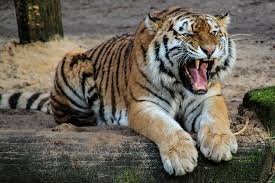

In [3]:
from IPython.display import Image, display

display(Image(path+'/slike/tiger.jpg')) # Slika iz https://phys.org/news/2019-11-indian-authorities-exaggerated-tiger.html

## Prikaz random slike iz množice

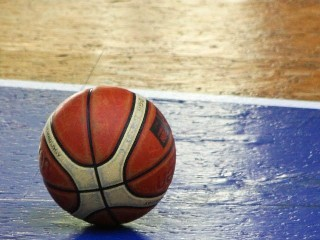

In [4]:
import random, os
# Prikaz nakljucne slike
if GoogleColab:
    path_to_images = "/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/"
else:
    path_to_images = "./content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/"
random_file = random.choice([
    x for x in os.listdir(path_to_images)
    if os.path.isfile(os.path.join(path_to_images, x))
])
Image(path_to_images+random_file)

## Funkcija napovejSlike - za import

In [5]:
alexnet = models.alexnet(weights='IMAGENET1K_V1')
alexnet.eval()

def napovejSlike(slika, alexnet):
   # Obdelava velikosti slike
    data_transforms = transforms.Compose([
        #transforms.Resize((224,224)), # Nastavi velikost slicic 224x224
        transforms.Resize((227,227)),      # Nastavi velikost slicic 227x227
        transforms.ToTensor(),              # Input na Tensorjev format
        transforms.Normalize( # Normalizacija
            mean=[0.485, 0.456, 0.406], 
            std=[0.229, 0.224, 0.225]
        )])
    # Odpiranje slik
    transformed_img = data_transforms(slika) # Klicanje funkcije za obdelavo velikosti slik(e)
    batch_img = torch.unsqueeze(transformed_img, 0)
    
    output = alexnet(batch_img)

    sorted, indices = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0 
    
    return indices, percentage

In [6]:
# Izboljsana napoved - vse slike v mapi
CasZacetek = time.time()

df = None
#if df is not None:
    #df = df.drop(['SlicicaNo.','Dejansko','Napovedano','PoNiaPy','Tocnost'], axis=1, errors='ignore')


#images = glob.glob("/content/gdrive/MyDrive/Colab Notebooks/slike/*.jpg")
images = glob.glob(path_to_images+'*.JPEG')
podatki = []
for image in images:
   with open(image, 'rb') as file:
        img = PIL.Image.open(file)
        indices, percentage = napovejSlike(img, alexnet)
        i = 0
        with open(path+'/class_names_ImageNet.txt') as labels:
            classes = [i.strip() for i in labels.readlines()]

            # Top 5 razredov po verjetnosti napovedi
            results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]

            podatki.append({
                'Slicica No.': (Path(file.name).stem)[20:],
                'Napovedano':  results[0][0],
                'PoNiaPy' : ['Sledi'],
                'Tocnost' : results[0][1],
                'ImeDatoteke' : (Path(file.name).stem + ".JPEG")
            })

            #print("\nTop 5 napovedanih razredov")
            #for i in range(5):
                #print('{}: {:.4f}%'.format(results[i][0], results[i][1]))
            print('\nNaš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')

df = pd.DataFrame(data=podatki)
df.sort_values(by='Tocnost', ascending=False, inplace=True)

CasKonec = time.time()
trajanje = CasKonec - CasZacetek
print("Trajanje: ", trajanje)
# Merjenje časa - CPU 71 sekund ; GPU 301; TPU 338 - nekaj ni ok..


Naš napovedan razred: sea lion 
Algoritem to trdi z zagotovostvjo 16.62%

Naš napovedan razred: wall clock 
Algoritem to trdi z zagotovostvjo 12.20%

Naš napovedan razred: kit fox, Vulpes macrotis 
Algoritem to trdi z zagotovostvjo 71.74%

Naš napovedan razred: tricycle, trike, velocipede 
Algoritem to trdi z zagotovostvjo 27.88%

Naš napovedan razred: chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour 
Algoritem to trdi z zagotovostvjo 99.42%

Naš napovedan razred: mountain bike, all-terrain bike, off-roader 
Algoritem to trdi z zagotovostvjo 80.35%

Naš napovedan razred: sulphur butterfly, sulfur butterfly 
Algoritem to trdi z zagotovostvjo 48.32%

Naš napovedan razred: lakeside, lakeshore 
Algoritem to trdi z zagotovostvjo 42.39%

Naš napovedan razred: quail 
Algoritem to trdi z zagotovostvjo 96.34%

Naš napovedan razred: mashed potato 
Algoritem to trdi z zagotovostvjo 18.04%

Naš napovedan razred: neck brace 
Algoritem to trdi z zagotovostvjo 7.32%

N

## Slike iz ILSVRC2010
Model se je na njih izkazal za zelo uspešnega

Tukaj imamo tabelo imen datotek ter kategorij, v katero spadajo

In [7]:
df1 = pd.read_csv(path+'/MatLab/ID,Ime,Kategorija.csv', sep=";", index_col=0)
df1.sample(5) 

,ImeDatoteke,Kategorija
ID_Kategorija,,
50,ILSVRC2010_val_00045803.JPEG,head cabbage
773,ILSVRC2010_val_00021691.JPEG,"nail polish, nail enamel, nail varnish"
809,ILSVRC2010_val_00024070.JPEG,park bench
554,ILSVRC2010_val_00002604.JPEG,optical telescope
9,ILSVRC2010_val_00009521.JPEG,cranberry


## Skupne kategorije ILSVRC dataset in AlexNet napovedi
* 634
* Kategorije v preseku, ki jih zna napovedatovat tale AlexNet in slike iz ILSVRC2010
* Validacijska množica ni uporabljena za učenje, rezultati pa bodo verjetno višji kot pri testni, kar je v mojem primeru tudi smiselno
* Velika točnost pred NiaPy, nato pa nekaj popolnoma drugega za "enako" sliko..

In [8]:
df2 = pd.read_csv(path+'/MatLab/BothKategorije.csv', sep=";", index_col=0)
print(len(df2))

634


## Predpripravljena tabela 
* stolpec NiaPy se bo napolnil kasneje

In [9]:
# Združevanje za dejanske kategorije
df = df.merge(df1, how='inner', on='ImeDatoteke')
# Brisanje praznih (v df1 je 50.000 vrstic - celotna _val množica slik)
df.dropna(inplace=True)
# Združevanje iz dataframera samo skupnih kategorij --> Inner join odstrani vse primerke, ki jih naš model ne zna napovedat
df = df.merge(df2, how='inner', on='Kategorija')
# Preimenovanje stolpca
df = df.rename(columns={"Kategorija": "Dejanska_kategorija"})
# Zamenjava vrstnega reda stolpcev
df = df[['Slicica No.','Dejanska_kategorija','Napovedano','PoNiaPy','Tocnost','ImeDatoteke']]
df.sort_values(by=['Tocnost'], ascending=False).head(10)
# Dolžina df = 636, kar se sklada s številom različnih imen datotek, katerih kategorije zna napovedat
# V driveu je 1000 slik, vseh kategorij je ~1600, naš AlexNet jih zna napovedat ~2/3 = 1000. 
# Slike so randomly vendar konsistentno poimenovane, ~2/3 * 1000 = ~ 640, torej bo najverjetneje držalo

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
0,472,"chambered nautilus, pearly nautilus, nautilus","chambered nautilus, pearly nautilus, nautilus",[Sledi],100.000000,ILSVRC2010_val_00000472.JPEG
2,857,baseball,baseball,[Sledi],99.999962,ILSVRC2010_val_00000857.JPEG
4,041,"odometer, hodometer, mileometer, milometer","odometer, hodometer, mileometer, milometer",[Sledi],99.999893,ILSVRC2010_val_00000041.JPEG
6,116,manhole cover,manhole cover,[Sledi],99.998985,ILSVRC2010_val_00000116.JPEG
9,733,"maze, labyrinth","maze, labyrinth",[Sledi],99.998222,ILSVRC2010_val_00000733.JPEG
7,669,manhole cover,manhole cover,[Sledi],99.995628,ILSVRC2010_val_00000669.JPEG
13,620,"pool table, billiard table, snooker table","pool table, billiard table, snooker table",[Sledi],99.995300,ILSVRC2010_val_00000620.JPEG
16,362,"upright, upright piano","upright, upright piano",[Sledi],99.993362,ILSVRC2010_val_00000362.JPEG
3,013,baseball,baseball,[Sledi],99.993095,ILSVRC2010_val_00000013.JPEG
18,371,"bobsled, bobsleigh, bob","bobsled, bobsleigh, bob",[Sledi],99.992050,ILSVRC2010_val_00000371.JPEG


In [10]:
col_one_list = df['ImeDatoteke'].tolist()
col_one_list.sort()
# Število različnih imen datotek = 637 - Nekatere kategorije so podvojene (različne slike spadajo v enako kategorijo)
len(col_one_list)

637

## Tabela napačno napovedanih

In [11]:
dfNapacni = df[~df['Dejanska_kategorija'].isin(df['Napovedano'])]
dfNapacni.sort_values(by=['Tocnost'], ascending=False).head(10)

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
277,415,trimaran,catamaran,[Sledi],88.613716,ILSVRC2010_val_00000415.JPEG
315,193,screwdriver,nail,[Sledi],83.013718,ILSVRC2010_val_00000193.JPEG
323,114,"trolleybus, trolley coach, trackless trolley","streetcar, tram, tramcar, trolley, trolley car",[Sledi],82.251839,ILSVRC2010_val_00000114.JPEG
328,704,"green lizard, Lacerta viridis","American chameleon, anole, Anolis carolinensis",[Sledi],81.948624,ILSVRC2010_val_00000704.JPEG
347,855,"bakery, bakeshop, bakehouse",trifle,[Sledi],79.310356,ILSVRC2010_val_00000855.JPEG
401,134,"amphibian, amphibious vehicle","tank, army tank, armored combat vehicle, armou...",[Sledi],68.891769,ILSVRC2010_val_00000134.JPEG
419,344,cliff dwelling,"sloth bear, Melursus ursinus, Ursus ursinus",[Sledi],64.761986,ILSVRC2010_val_00000344.JPEG
425,155,partridge,"ruffed grouse, partridge, Bonasa umbellus",[Sledi],63.361889,ILSVRC2010_val_00000155.JPEG
437,353,"artichoke, globe artichoke",cardoon,[Sledi],60.402054,ILSVRC2010_val_00000353.JPEG
457,644,"hognose snake, puff adder, sand viper","stinkhorn, carrion fungus",[Sledi],56.974464,ILSVRC2010_val_00000644.JPEG


## Tabela pravilno napovedanih

In [44]:
dfPravilni = df[df['Dejanska_kategorija'].isin(df['Napovedano'])] #dfPravilni = df.loc[df['Dejanska_kategorija'] == df['Napovedano']] # Drugačna sintaksa za isto stvar
dfPravilni.sort_values(by=['Tocnost'], ascending=False).head(10)

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
0,472,"chambered nautilus, pearly nautilus, nautilus","chambered nautilus, pearly nautilus, nautilus",[Sledi],100.000000,ILSVRC2010_val_00000472.JPEG
2,857,baseball,baseball,[Sledi],99.999962,ILSVRC2010_val_00000857.JPEG
4,041,"odometer, hodometer, mileometer, milometer","odometer, hodometer, mileometer, milometer",[Sledi],99.999893,ILSVRC2010_val_00000041.JPEG
6,116,manhole cover,manhole cover,[Sledi],99.998985,ILSVRC2010_val_00000116.JPEG
9,733,"maze, labyrinth","maze, labyrinth",[Sledi],99.998222,ILSVRC2010_val_00000733.JPEG
7,669,manhole cover,manhole cover,[Sledi],99.995628,ILSVRC2010_val_00000669.JPEG
13,620,"pool table, billiard table, snooker table","pool table, billiard table, snooker table",[Sledi],99.995300,ILSVRC2010_val_00000620.JPEG
16,362,"upright, upright piano","upright, upright piano",[Sledi],99.993362,ILSVRC2010_val_00000362.JPEG
3,013,baseball,baseball,[Sledi],99.993095,ILSVRC2010_val_00000013.JPEG
18,371,"bobsled, bobsleigh, bob","bobsled, bobsleigh, bob",[Sledi],99.992050,ILSVRC2010_val_00000371.JPEG


## Statistika nad ILSVRC2010_val_\*\*\*\*****.JPEG

In [13]:
pravilno_napovedani = len(df.index) - len(dfNapacni.index)
print("Vsi napovedani: " + str(len(df.index)) + "\nPravilno napovedani: " + str(pravilno_napovedani) +"\nNapacno napovedani: " + str(len(dfNapacni.index)))
Tocnost = (pravilno_napovedani / len(df.index)* 100)
print("Tocnost: %.4f"% Tocnost+"%")

Vsi napovedani: 637
Pravilno napovedani: 541
Napacno napovedani: 96
Tocnost: 84.9294%


In [14]:
# Napoved 1 slike
slika = 'strawberries100-53.jpg'
with open(path+'/slike/'+slika, 'rb') as file:
    img = PIL.Image.open(file)
    indices, percentage = napovejSlike(img, alexnet)
    with open(path+'/class_names_ImageNet.txt') as labels:
            classes = [i.strip() for i in labels.readlines()]

            # Top 5 razredov po verjetnosti napovedi
            results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
            print('\nNaš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')


Naš napovedan razred: strawberry 
Algoritem to trdi z zagotovostvjo 100.00%


# NiaPy - za import
* install

In [15]:
if GoogleColab:
    !pip install NiaPy==2.0.0rc12 # GoogleColab
    !pip install -U scikit-image # GoogleColab


Prva ideja je po vzoru TestBenchmark.py, ustvarit array podoben "iskanje = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]"
* Pretvorba slike v 1d array
* Standardizacija (vsaka vrednost v arrayu / 255)
* Izvajanje NiaPy
* Pretvorba napovedanih vredenosti nazaj v vrednosti med 1 - 255 ( * 255)
* Pretvorba 1d arraya v sliko
* Prikaz slike, primerjava..


# Funkcije - za import

In [22]:
import cv2
# from google.colab.patches import cv2_imshow

def imgTO1d(img):
    oblika = img.shape
    img = img.reshape(-1)
    testko = np.divide(img, 255) 
    return oblika, testko

def imgFROM1d(testko, oblika):
    testkoDva = numpy.multiply(testko, 255)   # Comment??
    testko = asarray(testko)
    testko = testko.reshape(oblika)
    return testko

def napovedInPrikaz(PIL_image, alexnet):
    indices, percentage = napovejSlike(PIL_image, alexnet)
    with open(path+'/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]
        results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
        napoved = ('Naš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')
    return napoved

def napovedString(PIL_image, alexnet):
    indices, percentage = napovejSlike(PIL_image, alexnet)
    with open(path+'/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]
        results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
        napoved = str(results[0][0])
    return napoved

def fitness_NiaPy(iskanjeSlika, napovedan_array_iz_petdeset, alexnet, oblika, dejanska_kategorija, meja): # Fitness Funkcija, ki kliče moj Benchmark, ker lahko prejme samo 2 parametra
    fitness = fitness_default_absolute_benchmark_NiaPy(iskanjeSlika, napovedan_array_iz_petdeset)
    global stevec # global, da jo lahko spreminjam
    stevec += 1 # stevec iteracij

    if ( stevec > meja ):
      fitness *= BenchMark_NiaPy(napovedan_array_iz_petdeset, alexnet, oblika, dejanska_kategorija) # Vrne fitness_alexnet_top_other float - prepricanost alexneta v top nepravinlo napoved

    if ((stevec % 1000) == 0 ): # Vsakih 100 rund izpis
        print("Nova runda: " + str(stevec) + " Koncen fitness: " + str(fitness))

    return fitness

def BenchMark_NiaPy (napovedan_array_iz_petdeset, alexnet, oblika, dejanska_kategorija):
    fitness_alexnet_top_other = 1 # Fuzzy - top = 1, mnozenje z 1 prav tako ničesar ne spremeni, inicializacija

    solutionSpremenjen = imgFROM1d(napovedan_array_iz_petdeset, oblika) # Pretvorba iz 1d v array z obliko slike ( visina*sirina*depth)
    PIL_image_solution = PIL.Image.fromarray(np.uint8(solutionSpremenjen)).convert('RGB') # Pretvorba v PIL sliko, za AlexNet
    # Napoved AlexNet
    indices, percentage = napovejSlike(PIL_image_solution, alexnet)
    with open(path+'/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]
        results = [(classes[i], percentage[i].item()) for i in indices[0][:2]] # POZOR - zaradi hitrosti shranimo samo top DVE napovedi
        napoved = ('Naš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')
        
    # Top other - prisili napoved v prvo kategorijo, ki jo alexnet poda v enotskem vektorju
    if (str(results[0][0]) != dejanska_kategorija): # Če prva ni pravilno napovedana
      fitness_alexnet_top_other *= ( results[0][1] / 100 )
    else:                                           # Če prva je, sigurno druga ni - if deluje hitreje kot for
      fitness_alexnet_top_other *= ( results[1][1] / 100 )

    if ((stevec % 100) == 0 ):
        print(str(napoved) + " Runda: " + str(stevec) + " Alexnet Fitness: " + str(fitness_alexnet_top_other))

    return fitness_alexnet_top_other

def fitness_default_absolute_benchmark_NiaPy(iskanjeSlika, napovedan_array_iz_petdeset): # Fitness Funkcija, ki kliče moj Benchmark, ker lahko prejme samo 2 parametra
    fitness = 1
    fitness = numpy.sum(numpy.abs(iskanjeSlika-napovedan_array_iz_petdeset)) # Absolutna razlika v pikslih - default BenchMark
    fitness = ( (fitness / len(iskanjeSlika)) ) # Pretvorba vrednost med 0 in 1 po vzoru Fuzzy 
    fitness = (fitness / 255) # delitev z 255
    fitness = ( 1 - (fitness )) # negacija vrednosti
   
    return fitness

# NiaPy 10 pikslov


Naš napovedan razred: bib 
Algoritem to trdi z zagotovostvjo 18.83% Runda: 100 Alexnet Fitness: 0.1882661247253418
Naš napovedan razred: poncho 
Algoritem to trdi z zagotovostvjo 7.93% Runda: 200 Alexnet Fitness: 0.0793058967590332
Najboljsa resitev
Naš napovedan razred: shower cap 
Algoritem to trdi z zagotovostvjo 80.24%
Zadnja resitev
Naš napovedan razred: poncho 
Algoritem to trdi z zagotovostvjo 7.93%


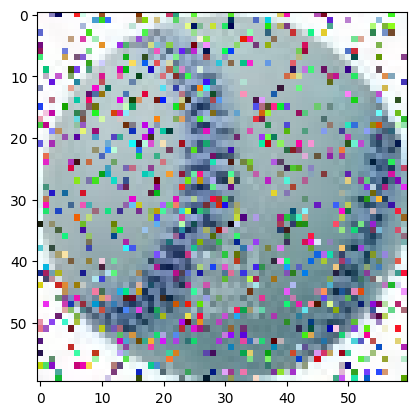

In [28]:
from NiaPy.algorithms.basic.pso import ParticleSwarmAlgorithm
from NiaPy.benchmarks import Benchmark
from NiaPy.task.task import OptimizationType, StoppingTask

stevilo_spremenjenih_pikslov = 10 # Poljubno nastavi

class TestBenchmark(Benchmark):

    def __init__(self, iskanjeSlika, alexnet):
        self.Lower = 0
        self.Upper = 1
        super().__init__(self.Lower, self.Upper)

        self.iskanjeSlika = iskanjeSlika
        self.alexnet = alexnet

    def function(self):
        def evaluate(D, solution):
            global benchmarkPrejsnji
            global najboljsiNiaPY
            global stevec
            dejanska_kategorija = "baseball"
            meja = 0 # V prvi iteraciji želimo priključitev NiaPy
            stevec += 1

            global deset_spremenjenih
            deset_spremenjenih = np.empty(len(iskanjeSlika), dtype=object) # Prazen array dolžine iskanega - Malo pomoči NiaPy
            deset_spremenjenih = self.iskanjeSlika

            for i in range( int((D/4)) ):
              i *= 4
              if ( i % 4 == 0):
                mesto_v_arrayu = 0
                mesto_v_arrayu = (solution[i] * (len(iskanjeSlika) / 3) )
             
              mesto_v_arrayu = int(mesto_v_arrayu)
              #print("MESTO:  "  + str(mesto_v_arrayu*3))
              
              for j in range(1,4):
                #print("NA MESTU:  " + str( ((mesto_v_arrayu) *3 ) + (j-1) ) + "DODALI:  " + str(solution[((i+j))]))
                deset_spremenjenih[((mesto_v_arrayu) *3 ) + (j-1)] = solution[((i+j))]

            deset_spremenjenih = (numpy.multiply(deset_spremenjenih, 255)).astype(int)
            #print("DESET = pomnozeni")
            #print(deset_spremenjenih)
            fitness = fitness_NiaPy(iskanjeSlika, deset_spremenjenih, alexnet, oblika, dejanska_kategorija, meja)
            #print("Spremenili smo med 10 in " + str(int(stevec*stevilo_spremenjenih_pikslov / 2)) + " pikslov")

            if (benchmarkPrejsnji < fitness):
                najboljsiNiaPY = deset_spremenjenih
                benchmarkPrejsnji = fitness
                #print("Najden boljsi")

            return fitness
        
        return evaluate

if __name__ == "__main__":

    originalSlika = cv2.imread(path+'/slike/bejzbol60-60.JPEG') # odpiranje - branje slike

    oblika, iskanjeSlika = imgTO1d(originalSlika) # Pretvorba slike v 1d array + njena oblika (x,y,3)

    najboljsiNiaPY = np.empty(len(iskanjeSlika), dtype=object) # Prazen array dolžine iskanega - Malo pomoči NiaPy
    benchmarkPrejsnji = 0 # Primerjava BenchMarkov med iteracijami - če je slabši, prepišemo "najboljsiNiaPY" in "benchmarkPrejsnji"

    algoritem = ParticleSwarmAlgorithm(NP=1000)

    stevec = 0

    benchm = TestBenchmark(iskanjeSlika=iskanjeSlika, alexnet=alexnet)
    task = StoppingTask(D=(stevilo_spremenjenih_pikslov*4),
                        nFES=100,
                        optType=OptimizationType.MAXIMIZATION,
                        benchmark=benchm)

    resitev, fitness = algoritem.run(task=task)

    # Prikaz najboljsega fitness-benchmark outputa NiaPy 
    print("Najboljsa resitev")
    resitev = imgFROM1d(najboljsiNiaPY, oblika) # Pretvorba nazaj v sliko
    if GoogleColab:
        cv2_imshow(resitev) # Google ColabPrikaz slike
    else:
        image = resitev.astype(np.uint8) # local
        imshow(image)
    resitev_image = PIL.Image.fromarray(np.uint8(resitev)).convert('RGB') # Pretvorba v PIL format - za AlexNet
    print(napovedInPrikaz(resitev_image, alexnet)) # Izpis napovedi AlexNet

    # Prikaz zadnjega outputa NiaPy 
    print("Zadnja resitev")
    napovedan_array_iz_petdeset = imgFROM1d(deset_spremenjenih, oblika) # Pretvorba nazaj v sliko
    if GoogleColab:
        cv2_imshow(napovedan_array_iz_petdeset) # Google Colab Prikaz slike
    else:
        #napovedan_array_iz_petdeset = napovedan_array_iz_petdeset[:,:,::-1] # Obrni barve BGR  --> RGB
        imshow(np.int32(napovedan_array_iz_petdeset))

    # Prikaz slike
    napovedan_array_iz_petdeset_image = PIL.Image.fromarray(np.uint8(napovedan_array_iz_petdeset)).convert('RGB') # Pretvorba v PIL format - za AlexNet
    print(napovedInPrikaz(napovedan_array_iz_petdeset_image, alexnet)) # Izpis napovedi AlexNet

# NiaPy 50 Array
* Trenutno ~[300] (deljivo s 4)
* 1,5mil iteracij 
* Po vseh različnih poskusih, fitness ne preseže ~0.6

Naš napovedan razred: ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle 
Algoritem to trdi z zagotovostvjo 16.38%
Naš napovedan razred: ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle 
Algoritem to trdi z zagotovostvjo 16.38%


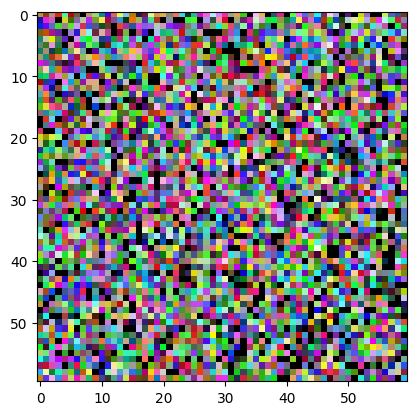

In [29]:
from NiaPy.algorithms.basic.pso import ParticleSwarmAlgorithm
from NiaPy.benchmarks import Benchmark
from NiaPy.task.task import OptimizationType, StoppingTask

class TestBenchmark(Benchmark):

    def __init__(self, iskanjeSlika, alexnet):
        self.Lower = 0
        self.Upper = 1
        super().__init__(self.Lower, self.Upper)

        self.iskanjeSlika = iskanjeSlika
        self.alexnet = alexnet

    def function(self):
        def evaluate(D, solution):
            global napovedan_array_iz_petdeset
            global benchmarkPrejsnji
            global najboljsiNiaPY
            dejanska_kategorija = "baseball"
            meja = 9999999999999999 # trenutno tako visoka, da se v B.M. ne vklopi AlexNet, saj niti ne uspem poustvariti originalne slike

            for i in range( int((D/4)) ):
              i *= 4
              if ( i % 4 == 0):
                mesto_v_arrayu = 0
                mesto_v_arrayu = (solution[i] * (len(iskanjeSlika) / 3) )
             
              mesto_v_arrayu = int(mesto_v_arrayu)
              #print("mesto_v_arrayu", mesto_v_arrayu)
              
              for j in range(1,4):
                #print("NA MESTU:  " + str( ((mesto_v_arrayu-1)*3 ) + (j-1) ) + "DODALI:  " + str(int((solution[((i+j))] * 255))))
                napovedan_array_iz_petdeset[((mesto_v_arrayu-1)*3 ) + (j-1)] = int((solution[((i+j))] * 255))
                
            fitness = fitness_NiaPy(iskanjeSlika, napovedan_array_iz_petdeset, alexnet, oblika, dejanska_kategorija, meja)

            if (benchmarkPrejsnji < fitness):
                najboljsiNiaPY = napovedan_array_iz_petdeset
                benchmarkPrejsnji = fitness

            return fitness
        
        return evaluate

if __name__ == "__main__":

    originalSlika = cv2.imread(path+'/slike/bejzbol60-60.JPEG') # odpiranje - branje slike

    oblika, iskanjeSlika = imgTO1d(originalSlika) # Pretvorba slike v 1d array + njena oblika (x,y,3)

    algoritem = ParticleSwarmAlgorithm(NP=1000)
    najboljsiNiaPY = np.empty(len(iskanjeSlika), dtype=object) # Prazen array dolžine iskanega - Malo pomoči NiaPy

    napovedan_array_iz_petdeset = np.empty(len(iskanjeSlika), dtype=object) # Prazen array dolžine iskanega - Malo pomoči NiaPy
    napovedan_array_iz_petdeset = np.full((len(napovedan_array_iz_petdeset)), 0)

    stevec = 0

    benchmarkPrejsnji = 0 # Primerjava BenchMarkov med iteracijami - če je slabši, prepišemo "najboljsiNiaPY" in "benchmarkPrejsnji"

    benchm = TestBenchmark(iskanjeSlika=iskanjeSlika, alexnet=alexnet)
    task = StoppingTask(D=312,
                        nFES=100,
                        optType=OptimizationType.MAXIMIZATION,
                        benchmark=benchm)

    resitev, fitness = algoritem.run(task=task)

    # Prikaz najboljsega fitness-benchmark outputa NiaPy 
    resitev = imgFROM1d(najboljsiNiaPY, oblika) # Pretvorba nazaj v sliko
    if GoogleColab:
        cv2_imshow(resitev) # Prikaz slike
    else:
        imshow(resitev)
    resitev_image = PIL.Image.fromarray(np.uint8(resitev)).convert('RGB') # Pretvorba v PIL format - za AlexNet
    print(napovedInPrikaz(resitev_image, alexnet)) # Izpis napovedi AlexNet

    # Prikaz zadnjega outputa NiaPy 
    napovedan_array_iz_petdeset = imgFROM1d(napovedan_array_iz_petdeset, oblika) # Pretvorba nazaj v sliko
    if GoogleColab:
        cv2_imshow(napovedan_array_iz_petdeset) # Prikaz slike
    else:
        imshow(napovedan_array_iz_petdeset)
    napovedan_array_iz_petdeset_image = PIL.Image.fromarray(np.uint8(napovedan_array_iz_petdeset)).convert('RGB') # Pretvorba v PIL format - za AlexNet
    print(napovedInPrikaz(napovedan_array_iz_petdeset_image, alexnet)) # Izpis napovedi AlexNet

# NiaPy -1 do +1

Naš napovedan razred: ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle 
Algoritem to trdi z zagotovostvjo 13.47% Runda: 100 Alexnet Fitness: 0.13472811698913575
Naš napovedan razred: matchstick 
Algoritem to trdi z zagotovostvjo 4.65%
Naš napovedan razred: matchstick 
Algoritem to trdi z zagotovostvjo 4.65%


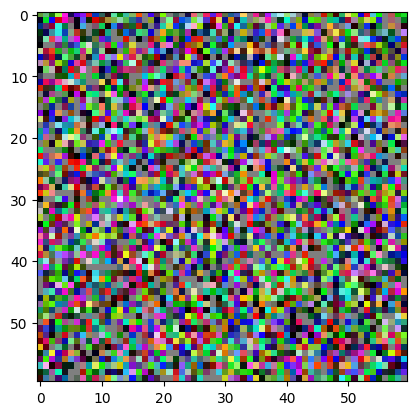

In [33]:
from NiaPy.algorithms.basic.pso import ParticleSwarmAlgorithm
from NiaPy.benchmarks import Benchmark
from NiaPy.task.task import OptimizationType, StoppingTask

class TestBenchmark(Benchmark):

    def __init__(self, iskanjeSlika, alexnet):
        self.Lower = -1
        self.Upper = 1
        super().__init__(self.Lower, self.Upper)

        self.iskanjeSlika = iskanjeSlika
        self.alexnet = alexnet

    def function(self):
        def evaluate(D, solution):
            global napovedan_array_iz_petdeset
            global benchmarkPrejsnji
            global najboljsiNiaPY
            dejanska_kategorija = "baseball"
            meja = 0 # trenutno tako visoka, da se v B.M. ne vklopi AlexNet, saj niti ne uspem poustvariti originalne slike
            cuvaj = 0.0

            for i in range( int((D/4)) ):
              i *= 4
              if ( i % 4 == 0):
                mesto_v_arrayu = 0
                mesto_v_arrayu = abs((solution[i] * (len(iskanjeSlika) / 3) ))
             
              mesto_v_arrayu = int(mesto_v_arrayu)
              #print("mesto_v_arrayu", mesto_v_arrayu)
              
              for j in range(1,4):
                cuvaj = ((napovedan_array_iz_petdeset[((mesto_v_arrayu-1)*3 ) + (j-1)]) * (1 + (solution[((i+j))])))
                #print("NA MESTU:  " + str( ((mesto_v_arrayu-1)*3 ) + (j-1) ) + "DODALI:  " + str(int((solution[((i+j))]))) + " CUVAJ : " + str(cuvaj))
                if ( (cuvaj > 0) & (cuvaj < 1) ):
                  napovedan_array_iz_petdeset[((mesto_v_arrayu-1)*3 ) + (j-1)] = cuvaj

            napovedan_array_iz_petdeset_za_benchmark = (numpy.multiply(napovedan_array_iz_petdeset, 255))
 
            fitness = fitness_NiaPy(iskanjeSlika, napovedan_array_iz_petdeset_za_benchmark, alexnet, oblika, dejanska_kategorija, meja)

            if (benchmarkPrejsnji < fitness):
                najboljsiNiaPY = napovedan_array_iz_petdeset
                benchmarkPrejsnji = fitness

            return fitness
        
        return evaluate

if __name__ == "__main__":

    originalSlika = cv2.imread(path+'/slike/bejzbol60-60.JPEG') # odpiranje - branje slike

    oblika, iskanjeSlika = imgTO1d(originalSlika) # Pretvorba slike v 1d array + njena oblika (x,y,3)

    algoritem = ParticleSwarmAlgorithm(NP=10000)
    najboljsiNiaPY = np.empty(len(iskanjeSlika), dtype=object) # Prazen array dolžine iskanega - Malo pomoči NiaPy

    napovedan_array_iz_petdeset = np.empty(len(iskanjeSlika), dtype=object) # Prazen array dolžine iskanega - Malo pomoči NiaPy
    napovedan_array_iz_petdeset = np.full((len(napovedan_array_iz_petdeset)), 0.5)

    stevec = 0

    benchmarkPrejsnji = 0 # Primerjava BenchMarkov med iteracijami - če je slabši, prepišemo "najboljsiNiaPY" in "benchmarkPrejsnji"

    benchm = TestBenchmark(iskanjeSlika=iskanjeSlika, alexnet=alexnet)
    task = StoppingTask(D=312,
                        nFES=100,
                        optType=OptimizationType.MAXIMIZATION,
                        benchmark=benchm)

    resitev, fitness = algoritem.run(task=task)

    # Prikaz najboljsega fitness-benchmark outputa NiaPy 
    resitev = imgFROM1d(najboljsiNiaPY, oblika) # Pretvorba nazaj v sliko
    if GoogleColab:
        cv2_imshow(resitev*255) # Prikaz slike
    else:
        imshow(resitev*255)
    resitev_image = PIL.Image.fromarray(np.uint8(resitev)).convert('RGB') # Pretvorba v PIL format - za AlexNet
    print(napovedInPrikaz(resitev_image, alexnet)) # Izpis napovedi AlexNet

    # Prikaz zadnjega outputa NiaPy 
    napovedan_array_iz_petdeset = imgFROM1d(napovedan_array_iz_petdeset, oblika) # Pretvorba nazaj v sliko
    if GoogleColab:
        cv2_imshow(napovedan_array_iz_petdeset*255) # Prikaz slike
    else:
        #result = napovedan_array_iz_petdeset[:,:,::-1] # Obrni barve BGR  --> RGB
        imshow(napovedan_array_iz_petdeset)
    napovedan_array_iz_petdeset_image = PIL.Image.fromarray(np.uint8(napovedan_array_iz_petdeset)).convert('RGB') # Pretvorba v PIL format - za AlexNet
    print(napovedInPrikaz(napovedan_array_iz_petdeset_image, alexnet)) # Izpis napovedi AlexNet

# Funkcije - metrike kakovosti slike - za import

In [56]:
def MSE(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum(numpy.float32(imageA) - numpy.float32(imageB) ** 2)
    err /= numpy.float32(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def compare_images(imageA, imageB):
    # compute the mean squared error and structural similarity
    # index for the images
    m = MSE(imageA, imageB)
    s = ssim(imageA, imageB, multichannel=True)
    # setup the figure
    fig = plt.figure(" ")
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = None)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = None)
    plt.axis("off")
    # show the images
    plt.show()

def PSNR(original, recreated): 
    mse = np.mean((original - recreated) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

# Pygad - za import

In [35]:
if GoogleColab:
    !pip install pygad

# PyGad Funkcije - za import

In [36]:
import pygad

def imgTO1dGari(img):
    oblika = img.shape # Shramba shapea slike v "oblika"
    #img = img.reshape((1, -1)) # Pretvorba v 1d array
    img = img.reshape(-1)
    img = np.divide(img, 255) # Standardizacija - deljenje z 255
    img = img.astype(numpy.int32) # pretvorba v float (manj decimalk(8), bistveno hitreje deluje)
    return oblika, img

def imgFROM1dGari(img, oblika):
    img = asarray(img) # Pretvorba v pravilen type
    img = img.reshape(oblika) # pretvorba nazaj v prvotno obliko
    # Pri PyGad ne množimo nazaj z 255, saj plt.imshow(result) prikazuje vrednosti pikslov med 0-1
    return img

def fitness_fun(solution, solution_idx): # Fitness Funkcija, ki kliče moj Benchmark, ker lahko prejme samo 2 parametra
    fitness = fitness_default_absolute_benchmark(solution)
    #fitness = fitness_RMS(solution)
    #fitness = fitness_SSIM(solution)
    #fitness = fitness_PearsonCoefCorelation(solution)

    global stevec # global, da jo lahko spreminjam
    global meja # global, da jo lahko spreminjam
    global mejaBool # global, da jo lahko spreminjam

    """
    Ko smo preko meje, za katero mislimo, da bo reprodukcija slike dovolj dobra
    Pogledamo, če je mejaBool False
    Naredimo napoved z AlexNet nad trenutnim solutionom
    Le če je pravilen, ga vključimo v BenchMark
    S tem dosežemo krajšanje časa izvajanja, saj se za vsak sol_per_pop * num_generations nato kliče AlexNet
    """
    if (mejaBool == False): # Ko smo preko meje
      if (stevec > meja):
          solutionSpremenjen = imgFROM1d(solution, oblika) # pretvorba iz 1d array v sliko
          solutionSpremenjen = solutionSpremenjen*255 # Množenje vseh vrednosti med 0-1 z 255
          solutionSpremenjen = solutionSpremenjen[:,:,::-1] # sprememba bgr --> rgb
          PIL_image_solution = PIL.Image.fromarray(np.uint8(solutionSpremenjen)).convert('RGB') # Ustvaritev PIL slike
          napoved = napovedString(PIL_image_solution, alexnet) # Napoved ki vrne samo string kategorije
          print("?VKLOP AlexNet v BenchMark?: " , napoved, stevec , meja )
          if (str(napoved) != dejanska_kategorija): # Ali je napoved nepravilna? Povečaj mejo // pri sol_per_pop=50 je to 50*10 klicev AlexNeta manj
              meja += 100
          if (str(napoved) == dejanska_kategorija): # Ali je napoved pravilna? Izpolni pogoj za vključitev AlexNeta
              mejaBool = True 
    
    if ( (stevec > meja) & (mejaBool == True) ): # Ko smo preko meje in je pogoj izpolnjen, kliči AlexNet BenchMark
      fitness *= BenchMarkGari(solution, solution_idx,alexnet, oblika, dejanska_kategorija) # Vrne fitness_alexnet_top_other float - prepricanost alexneta v top nepravilno napoved
    
    if (solution_idx == 1): # solution_idx se loopa od 0 do sol_per_pop
      stevec += 1 # Za vsako polno generacijo povecaj stevec
      if ((stevec % 100) == 0 ): # Vsakih 100 rund izpis
          print("Nova runda: " + str(stevec) + " Rezultat: " + str(fitness))

    # Preprečitev padca benchmarka pri vključitvi AlexNeta
    if (mejaBool == False):      
      fitness *= 0.5
    else:
      fitness = (fitness * 0.5) + 0.5

    return fitness

def BenchMarkGari (solution, solution_idx,alexnet, oblika, dejanska_kategorija):
    fitness_alexnet_top_other = 1 # Fuzzy - top = 1, mnozenje z 1 prav tako ničesar ne spremeni, inicializacija

    solutionSpremenjen = imgFROM1dGari(solution, oblika) # Pretvorba iz 1d v array z obliko slike ( visina*sirina*depth)
    solutionSpremenjen = solutionSpremenjen*255
    solutionSpremenjen = solutionSpremenjen[:,:,::-1]
    PIL_image_solution = PIL.Image.fromarray(np.uint8(solutionSpremenjen)).convert('RGB') # Pretvorba v PIL sliko, za AlexNet
    # Napoved AlexNet
    indices, percentage = napovejSlike(PIL_image_solution, alexnet)
    with open(path+'/class_names_ImageNet.txt') as labels:
        classes = [i.strip() for i in labels.readlines()]
        results = [(classes[i], percentage[i].item()) for i in indices[0][:2]] # POZOR - zaradi hitrosti shranimo samo top DVE napovedi
        napoved = ('Naš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')
        
    # Top other - prisili napoved v prvo kategorijo, ki jo alexnet poda v enotskem vektorju
    if (str(results[0][0]) != dejanska_kategorija): # Ce ze prva ni pravilno napovedana
      fitness_alexnet_top_other *= ( results[0][1] / 100 )
    else:                                           # Ce prva je, sigurno druga ni - if deluje hitreje kot for zanka
      fitness_alexnet_top_other *= ( results[1][1] / 100 )

    if (solution_idx == 20): # Vsake tolko izpis, da lahko spremljamo
        if ((stevec % 10) == 0 ):
            print(str(napoved) + " Runda: " + str(stevec) + " Fitness alexneta: " + str(fitness_alexnet_top_other))

    return fitness_alexnet_top_other
    
# Se je izkazal za najboljšega
def fitness_default_absolute_benchmark(solution): # Fitness Funkcija, ki kliče moj Benchmark, ker lahko prejme samo 2 parametra
    fitness = 1
    fitness = numpy.sum(numpy.abs(iskanjeSlika-solution)) # Absolutna razlika v pikslih - privzet BenchMark
    fitness = ( (fitness / len(solution)) ) # Pretvorba vrednost med 0 in 1 po vzoru mehke logike 
    fitness = ( 1 - fitness) # negacija vrednosti
    return fitness

# Primer fitnessa z geometrijskim povprečjem arrayev
def fitness_geometrical_mean (solution):
  fitness = 1
  fitness = np.prod(np.power(numpy.abs(iskanjeSlika-solution), (1/(len(solution)))))
  fitness = ( 1 - fitness) # negacija vrednosti
  return fitness

# Primer fitnessa z RMS
def fitness_RMS (solution):
  fitness = 1
  fitness = numpy.sum(numpy.square(numpy.abs(iskanjeSlika-solution)))
  fitness = ( (fitness / len(solution)) ) # Pretvorba vrednost med 0 in 1 po vzoru Fuzzy 
  fitness = numpy.sqrt(fitness)
  fitness = ( 1 - fitness) # negacija vrednosti
  return fitness

# Primer fitnessa s strukturno podobnostjo 2 slik
def fitness_SSIM (solution):
  fitness = 1
  solution = imgFROM1d(solution, oblika) # Pretvorba nazaj v sliko
  fitness = ssim(originalSlika, solution, multichannel=True)
  return fitness

# Pearson correlation coefficient - Primer fitnessa s Pearsonovim korelacijskim koeficientom
def fitness_PearsonCoefCorelation (solution):
  fitness = 1
  fitness = stats.pearsonr(solution, iskanjeSlika)[0]
  fitness = ( (fitness/2) + 0.5) # (da so vrednosti med 0 in1 namesto med -1 in 1)
  return fitness

# PyGad
* trenutna slika 120*120

Ob spremembi slike potrebno spremeniti dva stringa: "dejanska_kategorija" in "originalSlika"

Nova runda: 100 Rezultat: 0.5163654631721145
Nova runda: 200 Rezultat: 0.5213322947469298
Nova runda: 300 Rezultat: 0.5263056469903145
Nova runda: 400 Rezultat: 0.530827475828386
Nova runda: 500 Rezultat: 0.5354200561048664
Nova runda: 600 Rezultat: 0.5402427288309302
Nova runda: 700 Rezultat: 0.5448982533787556
Nova runda: 800 Rezultat: 0.5494454862183327
Nova runda: 900 Rezultat: 0.553991003334778
Nova runda: 1000 Rezultat: 0.5584569344232019


C:\Users\Rok\PycharmProjects\AlexNet-inaccurate-using-NiaPy-and-GARI\alex_venv\lib\site-packages\pygad\pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


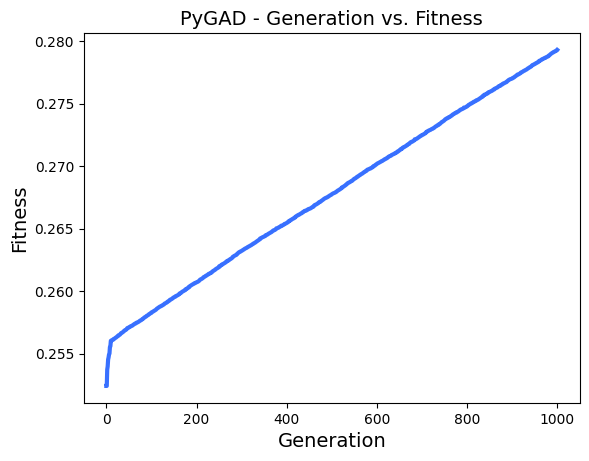

Fitness value of the best solution = 0.27929507121628605
Index of the best solution : 4
Best fitness value reached after 1000 generations.


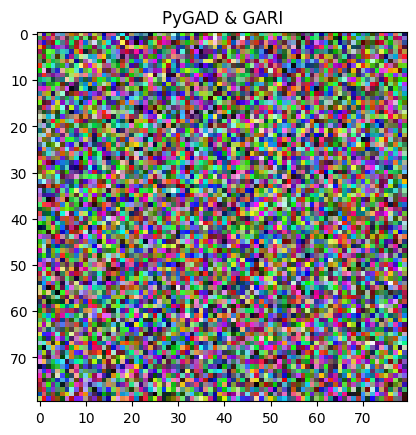

C:\Users\Rok\AppData\Local\Temp\ipykernel_11172\2073320830.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  s = ssim(imageA, imageB, multichannel=True)
C:\Users\Rok\PycharmProjects\AlexNet-inaccurate-using-NiaPy-and-GARI\alex_venv\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


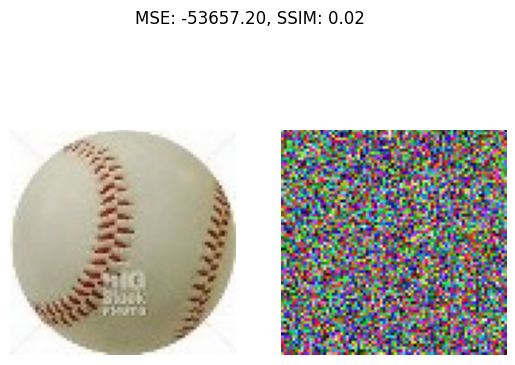

PSNR vrednost je -35.3445 dB
Trajanje izvedbe 17.190449953079224sekund 


In [45]:
CasZacetek = time.time()

#dejanska_kategorija = "manhole cover" # kaj je dejansko na sliki? # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
dejanska_kategorija = "baseball"
stevec = 0 # Števec rund, pogoji za izpis...
meja = 800000 # 80000 Meja, kdaj začnemo preverjat, če AlexNet že prepozna kaj je na sliki
mejaBool = False  # True Če Alexnet pravilno napove, nastavimo na True, ga vklopimo v BenchMark

originalSlika = cv2.imread(path+'/slike/bejzbol80-80.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
#originalSlika = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/slike/baseball-120-120.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!

oblika, iskanjeSlika = imgTO1dGari(originalSlika) # Pretvorba slike v 1d array + shramba njene oblike(shape) 

zmnozek_oblika = numpy.prod(oblika)

ga_instance = pygad.GA(num_generations=1000, # 82000 nekje med 20 in 30k so slike alexnetu prvic prepoznavne
                       num_parents_mating=20, #20
                       fitness_func=fitness_fun,
                       sol_per_pop=50, #50
                       num_genes=int(zmnozek_oblika), # int64 ne gre, pretvorba z int()
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01, # Mutacija 1 / 2 pikslov (odvisno od velikosti)
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

ga_instance.run() # Zagon

ga_instance.plot_result() # Izris grafa z matplotlib

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution() # Iz najboljse resitve poberemo array, fitness in njen index
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness)) 
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = imgFROM1dGari(solution, oblika) # Pretvorba nazaj v sliko

if GoogleColab:
    cv2_imshow(result*255) # prikaz slike z OpenCV
else:
    imshow(result*255)

result = result[:,:,::-1] # Obrni barve BGR  --> RGB 
plt.imshow(result)
plt.title("PyGAD & GARI")
plt.show()

originalSlika = originalSlika[:,:,::-1]  # Obrni barve BGR  --> RGB 
#result = result[:,:,::-1]
result = np.int32(result*255)
err = compare_images(originalSlika, result)
print(f"PSNR vrednost je %.4f dB" %PSNR(originalSlika, result*255) ) # resitev odResitev najboljsiNiaPY

CasKonec = time.time()
trajanje = CasKonec - CasZacetek
print("Trajanje izvedbe % ssekund " %trajanje) 

In [46]:
dfPravilni = dfPravilni.sort_values(by=['Tocnost'], ascending=False)

dfPravilni.to_excel(path+'/pravilnoNapovedani.xlsx', index=False)
dfPravilni.to_excel(path+'/pravilnoNapovedaniIndex.xlsx', index=True)

dfPravilni.head()

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
0,472,"chambered nautilus, pearly nautilus, nautilus","chambered nautilus, pearly nautilus, nautilus",[Sledi],100.000000,ILSVRC2010_val_00000472.JPEG
2,857,baseball,baseball,[Sledi],99.999962,ILSVRC2010_val_00000857.JPEG
4,041,"odometer, hodometer, mileometer, milometer","odometer, hodometer, mileometer, milometer",[Sledi],99.999893,ILSVRC2010_val_00000041.JPEG
6,116,manhole cover,manhole cover,[Sledi],99.998985,ILSVRC2010_val_00000116.JPEG
9,733,"maze, labyrinth","maze, labyrinth",[Sledi],99.998222,ILSVRC2010_val_00000733.JPEG


C:\Users\Rok\AppData\Local\Temp\ipykernel_11172\2073320830.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  s = ssim(imageA, imageB, multichannel=True)


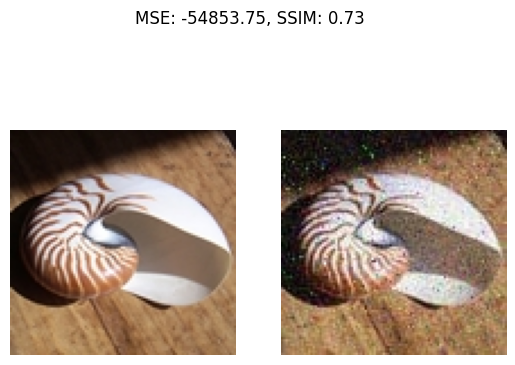

In [48]:
Prvotna = cv2.imread(path+'/slike/chambered nautilus, pearly nautilus, nautilus.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/nautlius2-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
if GoogleColab:
    cv2_imshow(Prvotna) # prikaz slike z OpenCV
    cv2_imshow(Poustvarjena) # prikaz slike z OpenCV
else:
    cv2.imshow("ovkir", Prvotna)
    cv2.waitKey(0)
    #imshow(Prvotna)
    cv2.imshow("ovkir2", Poustvarjena)
    cv2.waitKey(0)
    #imshow(Poustvarjena)

Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)

C:\Users\Rok\AppData\Local\Temp\ipykernel_11172\3222581901.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  s = ssim(imageA, imageB, multichannel=True)


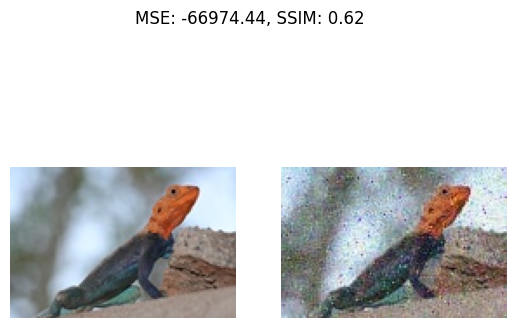

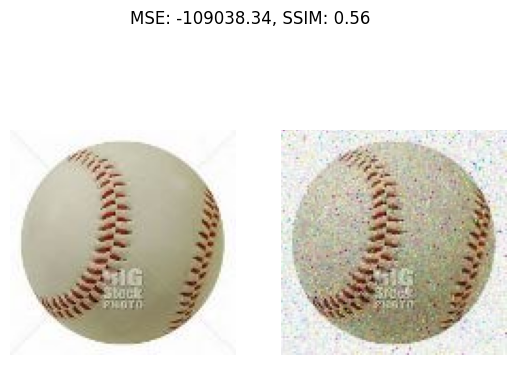

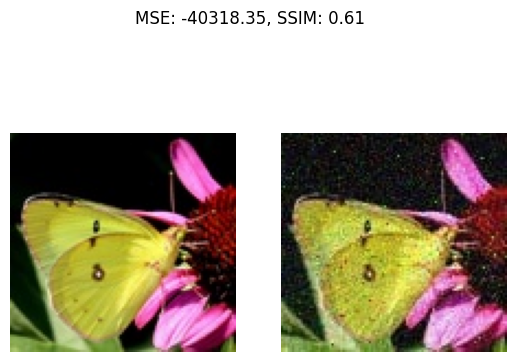

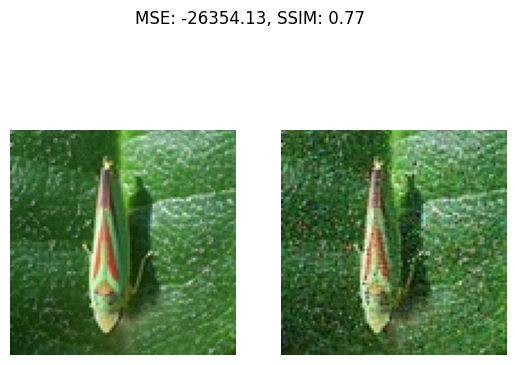

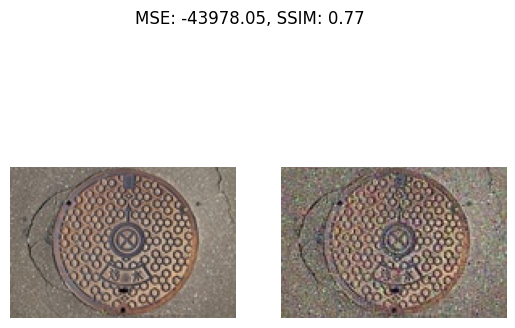

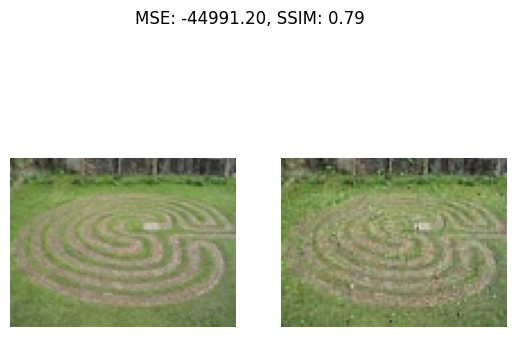

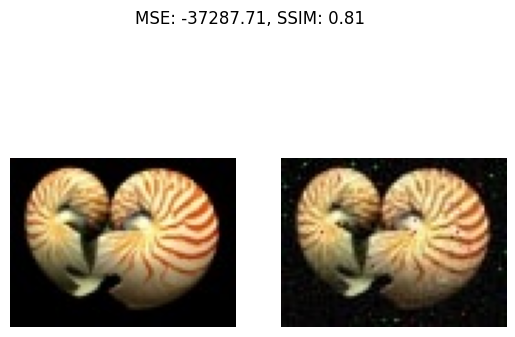

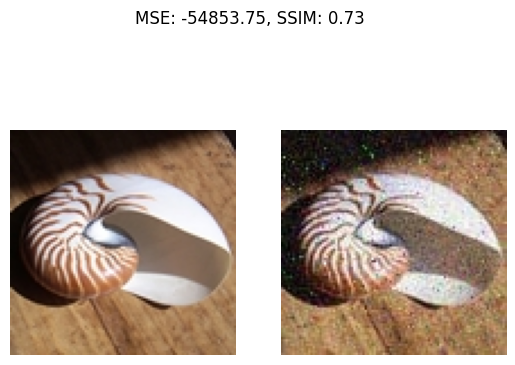

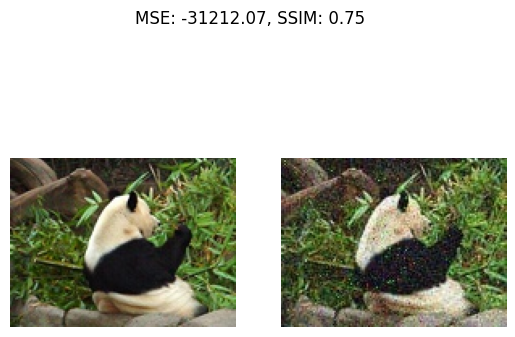

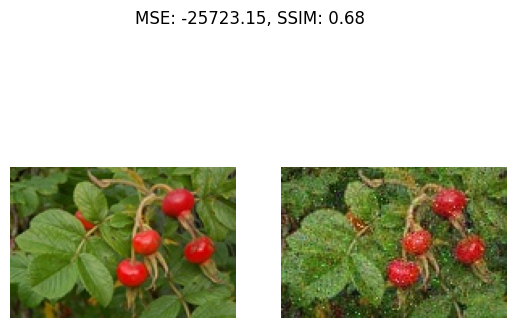

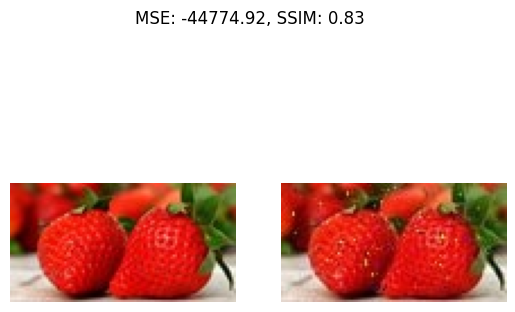

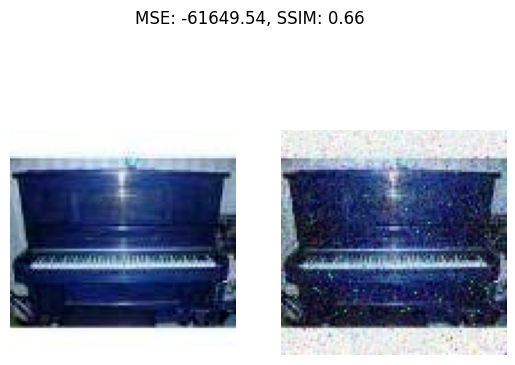

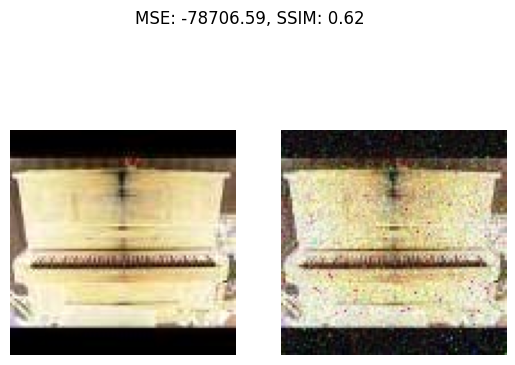

In [57]:
######Agama
Prvotna = cv2.imread(path+'/slike/agama.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/agama-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
#cv2_imshow(Prvotna) # prikaz slike z OpenCV
#cv2_imshow(Poustvarjena) # prikaz slike z OpenCV
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Baseball 1 
Prvotna = cv2.imread(path+'/slike/baseball-120-120.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/baseball-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Butterfly
Prvotna = cv2.imread(path+'/slike/sulphur butterfly, sulfur butterfly.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/butterfly-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Leafhopper
Prvotna = cv2.imread(path+'/slike/leafhopper.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/leafhopper-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Manhole cover
Prvotna = cv2.imread(path+'/slike/manhole-cover.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/manhole-cover-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Maze
Prvotna = cv2.imread(path+'/slike/maze.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/maze-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Nautlius 1
Prvotna = cv2.imread(path+'/slike/nautlius80-60.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/nautilus-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Nautlius 2
Prvotna = cv2.imread(path+'/slike/chambered nautilus, pearly nautilus, nautilus.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/nautlius2-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Panda
Prvotna = cv2.imread(path+'/slike/giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/panda-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Rosehip
Prvotna = cv2.imread(path+'/slike/hip, rose hip, rosehip.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/rosehip-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)
###### Strawberry
Prvotna = cv2.imread(path+'/slike/strawberries100-53.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/strawberry-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!K
Prvotna = Prvotna[:,:,::-1]  
Poustvarjena = Poustvarjena[:,:,::-1]  
err = compare_images(Prvotna, Poustvarjena)

###### Upright piano
Prvotna = cv2.imread(path+'/slike/upright piano.JPEG') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
Poustvarjena = cv2.imread(path+'/slike/Recreated_images/upright piano-recreated.jpg') # Branje slike # SPREMEMBA SLIKE - SPREMEMBA STRINGA!
#Prvotna = Prvotna[:,:,::-1]
#Poustvarjena = Poustvarjena[:,:,::-1]
err = compare_images(Prvotna, Poustvarjena)

#Prvotna = Prvotna[:,:,::-1]
#Poustvarjena = Poustvarjena[:,:,::-1]
#err = compare_images(Prvotna, Poustvarjena)

Prvotna = ~Prvotna
Poustvarjena = ~Poustvarjena
err = compare_images(Prvotna, Poustvarjena)